# Assignment #3 - Clustering

### <font color="red"> DUE: October 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Mohamad Aboufoul </font>

# I. Overview

The objective of this assignment is to implement unsupervised learning on two sets of data by using 2 types of clustering algorithms. The same two data sets from assignment 2 are used in this assignment, with the final column containing the corresponding class data being removed from each data set to make the clustering possible. Copies of the original data sets were maintained in separate variables to measure the accuracy of each clustering algorithm. This was accomplished by looping through each sample and comparing the prediction from the clustering algorithm in question to the actual class that the sample belonged to. While this will only be the most accurate for n_clusters that match the number of classes in the given data set, it still helps in comparing the different clustering algorithms to one another on lower and higher n_cluster values.

This assignment involved implementing K-means clustering (which involves finding n_cluster mean values to which points are classified based on the mean that they are closest to) and Gaussian Mixture Modeling (GMM; which involves taking the Gaussian distributions of the features and using the contours derived from these distributions intersecting to separate the data into clusters). K-means clustering offers a definite class for each point, whereas GMM gives each point a probability that it belongs to each class in a data set; the class with the highest probability is typically assigned to that point.

The scikit-learn library was used to implement both the K-means and GMM algorithms on the Iris data set as well as the Glass data set below.

# II. Data

Two data sets used: 
- Iris Data set (https://archive.ics.uci.edu/ml/datasets/iris)
- Glass Data set (https://www.kaggle.com/uciml/glass)

The first data set used in this assignment is the iris data set, which consists of 150 flowers classified as Iris-setosa, Iris-versicolor, and Iris-virginica. The features of this data set are the Sepal Length, Sepal Width, Petal Length, and Petal Width of each sample, all measured in centimeters.

The second data set used in this assignment is a glass data set, which classifies samples according to glass type. Much modification was needed for this set, with a reduction to 155 samples, the removal of many features, and the reduction to only 3 classes being represented. The classes are Float Processed Building Windows, Non-float Processed Building Windows, and Float Processed Vehicle Windows. The features that were kept in this data set were the refractive index (RI) and the weight percentages of Sodium Oxide (Na), Aluminum Oxide (Al), and Calcium Oxide (Ca).

Data tables of each set can be seen below along with corresponding visualizations.

## II-a. Iris Data Set



In [862]:
import csv
import pandas as pd
import os
import numpy as np

pd.set_option('display.max_rows', 10) #Limits number of rows displayed below

#Displays csv file of the features
irisData = pd.read_csv('Iris.csv')
irisData

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


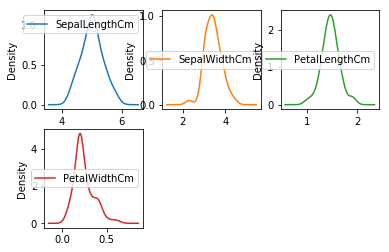

In [863]:
import matplotlib.pyplot as plt
import pandas as pd

irisSetosaData = pd.read_csv('Iris.csv', nrows = 50, usecols=[1,2,3,4])
irisSetosaData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Setosa class
 - All of the features appear to have a bell-shaped distribution with the exception of the Petal Width
  - The Petal Width appears to have a distribution that is slightly skewed right
 - Finally, the variance appears to be the greatest on the Sepal Length

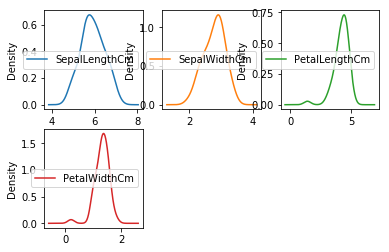

In [864]:
import matplotlib.pyplot as plt
import pandas as pd

irisVersicolorData = pd.read_csv('Iris.csv', skiprows = 50, nrows = 50, usecols=[1,2,3,4], names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
irisVersicolorData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Versicolor class
 - The Sepal Length and Width to have moderately bell-shaped distributions while the Petal Length and Width appear to have distributions with a slight skew to the left
 - Finally, the variances appear to be significantly greater for the Sepal Length and Width than they are for the Petal Length and Width

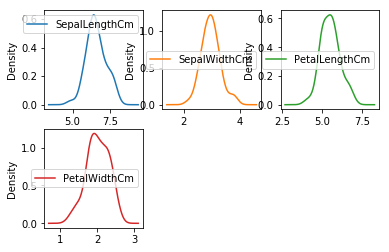

In [865]:
import matplotlib.pyplot as plt
import pandas as pd

irisVirginicaData = pd.read_csv('Iris.csv', skiprows = 100, nrows = 50, usecols=[1,2,3,4],  names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
irisVirginicaData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Virginica class
 - All appear to have moderately bell-shaped distributions
 - The variance for the Petal Width appears to be much greater than that of the other 3 features, which are much more similar to one another

## II-b. Glass Data Set


In [866]:
pd.set_option('display.max_rows', 10) #Limits number of rows displayed below

#Displays csv file of the features
glassData = pd.read_csv('glass.csv')
glassData

,RI,Na,Al,Ca,Type
0,1.52101,13.64,1.10,8.75,BuildWindows-Float
1,1.51761,13.89,1.36,7.83,BuildWindows-Float
2,1.51618,13.53,1.54,7.78,BuildWindows-Float
3,1.51766,13.21,1.29,8.22,BuildWindows-Float
4,1.51742,13.27,1.24,8.07,BuildWindows-Float
...,...,...,...,...,...
150,1.51776,13.53,1.52,8.79,VehicleWindows-Float
151,1.51796,13.50,1.63,8.81,VehicleWindows-Float
152,1.51832,13.33,1.54,8.99,VehicleWindows-Float
153,1.51934,13.64,0.75,8.89,VehicleWindows-Float


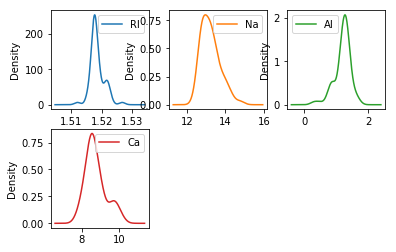

In [867]:
import matplotlib.pyplot as plt
import pandas as pd

buildWindowsFloatData = pd.read_csv('glass.csv', nrows = 66, usecols=[0,1,2,3])
buildWindowsFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Float Processed Building Windows class
 - The Refractive Index, Sodium Oxide weight %, and Calcium Oxide weight % appear to have distributions slightly skewed right
  - The Aluminum Oxide weight % appears to be slightly skewed left
 - The Sodium Oxide weight % appears to have the greatest variance

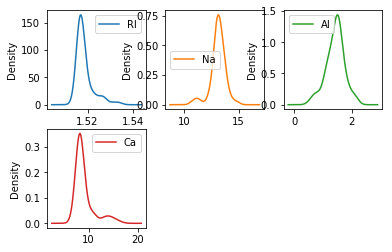

In [868]:
import matplotlib.pyplot as plt
import pandas as pd

buildWindowsNonFloatData = pd.read_csv('glass.csv', skiprows = 66, nrows = 72, usecols=[0,1,2,3], names = ['RI', 'Na', 'Al', 'Ca'])
buildWindowsNonFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Non-Float Processed Building Windows class
 - The RI and Ca features appear to have distributions skewed to the right whereas the Na feature appears to be skewed to the left
  - The Al feature appears to be moderately bell-shaped in its distribution
 - Finally, the variance appears to be the greatest for the Al feature distribution

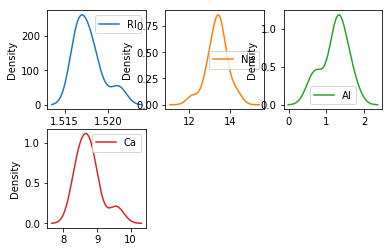

In [869]:
import matplotlib.pyplot as plt
import pandas as pd

vehicleWindowsFloatData = pd.read_csv('glass.csv', skiprows = 138, nrows = 17, usecols=[0,1,2,3], names = ['RI', 'Na', 'Al', 'Ca'])
vehicleWindowsFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Float Processed Vehicle Windows class
 - The RI and Ca distributions appear to be slightly skewed to the right whereas the Na and Al distributions appear to be skewed to the left
 - All of these features appear to have a greater variance for this class than they did for the other classes

# III. Methods


## K-Means and Gaussian Mixture Model (GMM) Summary

K-means involves finding n_cluster mean values to which points are classified based on the mean that they are closest to. Gaussian Mixture Modeling (GMM) involves taking the Gaussian distributions of the features of a given data set and using the contours derived from intersections of these distributions to separate the data into clusters. K-means clustering offers a definite class for each point, whereas GMM gives each point a probability that it belongs to each class in a data set; the class with the highest probability is typically assigned to that point.

## Varying K Description

Each data set below first has its class column converted from text to numbers (which for both data sets are 0, 1, & 2). A copy of each new matrix is maintained while a separate version without the class column is obtained to be used as training data for each clustering algorithm. The algorithms are implemented using the scikit-learn library, with varying clusters of 3 (the actual number of classes for each), 2, and 4. Additionally, for each clustering algorithm for each data set, there is a list that will hold a True value for samples whose predicted clusters match the actual class to which they belong and a False value otherwise. These "accuracy lists" will be used in the results section to find the overall accuracy of each model. Of course, models with 2 or 4 clusters will have lower accuracies than those with 3 clusters (same as number of classes in each data set), but they can still be used to compare the performance of the K-means to the GMM.

## Explanation of Code

Right after the modifications of the data set matrices, the K-means training is performed by using the scikit-learn class KMeans. The number of desired clusters is used as the parameter, and the .fit() method is used on the object to train the model on the training data. The predictions are found using the .labels\_ attribute on the object and storing the result in the proper variable. The centroids of the model are found using the .cluster\_centers\_ attribute on the object and storing the result in the proper variable. The accuracy lists are build by looping through the predictions list found from the .labels\_ attribute and comparing each value to the actual class of the corresponding sample (found in the original data set matrix). If there is a match, True is appended. If not, False is appended.

The GMM training is performed by using the scikit-learn class GaussianMixture. The centroids (or cluster centers) are found by using the .means\_ attribute and storing the value in the appropriate variable. The predictions, however, can only be found by using the .predict() method on the training data after fitting the model to the training data. The accuracy lists are built in the same manner as they were for the K-means models. Additionally, there is a predict_proba() method that obtains the probability that each sample belongs to each class in the data set. The value is stored in the appropriate variable.

### Iris Data Set Modifications

In [870]:
import numpy as np
import pandas as pd

irisData = pd.read_csv('Iris.csv')
flowerDictionary = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
irisData['Species'] = irisData['Species'].apply(lambda x: flowerDictionary[x])

irisDataFeatures = irisData.iloc[:, [1,2,3,4]].as_matrix() #Extracts features of each iris, excluding the class; Converts into matrix
irisData = irisData.iloc[:, [1,2,3,4,5]].as_matrix() #Converts original iris data into matrix (includes corresponding classes)

### Glass Data Set Modifications

In [871]:
glassData = pd.read_csv('glass.csv')
glassDictionary = {'BuildWindows-Float': 0, 'BuildWindows-NonFloat': 1, 'VehicleWindows-Float': 2}
glassData['Type'] = glassData['Type'].apply(lambda x: glassDictionary[x])

glassDataFeatures = glassData.iloc[:, [0,1,2,3]].as_matrix() #Extracts features of each glass sample, excluding the class; Converts into matrix
glassData = glassData.iloc[:, [0,1,2,3,4]].as_matrix() #Converts original glass data into matrix (includes corresponding classes)

### Iris Data K-means Training

In [872]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
import numpy as np

irisData, irisDataFeatures = shuffle(irisData, irisDataFeatures, random_state = 5) #MAKE SURE YOU RUN CELL ABOVE THIS IN ORDER TO MAINTAIN CONSISTENT RANDOM STATE

irisAccuracyList_2 = []
irisAccuracyList_3 = []
irisAccuracyList_4 = []

#kmeans 3 clusters
kmeansIris3 = KMeans(n_clusters = 3)
kmeansIris3.fit(irisDataFeatures)
irisPredictions3 = kmeansIris3.labels_

for i in range(len(irisPredictions3)):
    if(irisPredictions3[i] == int(irisData[i][4])):
        irisAccuracyList_3.append(True)
    else:
        irisAccuracyList_3.append(False)

kmeansCentroidsIris3 = kmeansIris3.cluster_centers_
kmeansLabelsIris3 = kmeansIris3.labels_

#kmeans 2 clusters
kmeansIris2 = KMeans(n_clusters = 2)
kmeansIris2.fit(irisDataFeatures)
irisPredictions2 = kmeansIris2.labels_

for i in range(len(irisPredictions2)):
    if(irisPredictions2[i] == int(irisData[i][4])):
        irisAccuracyList_2.append(True)
    else:
        irisAccuracyList_2.append(False)

kmeansCentroidsIris2 = kmeansIris2.cluster_centers_
kmeansLabelsIris2 = kmeansIris2.labels_


#kmeans 4 clusters
kmeansIris4 = KMeans(n_clusters = 4)
kmeansIris4.fit(irisDataFeatures)
irisPredictions4 = kmeansIris4.labels_

for i in range(len(irisPredictions4)):
    if(irisPredictions4[i] == int(irisData[i][4])):
        irisAccuracyList_4.append(True)
    else:
        irisAccuracyList_4.append(False)

kmeansCentroidsIris4 = kmeansIris4.cluster_centers_
kmeansLabelsIris4 = kmeansIris4.labels_

### Glass Data K-means Training

In [873]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
import numpy as np

glassData, glassDataFeatures = shuffle(glassData, glassDataFeatures, random_state = 5) #MAKE SURE YOU RUN CELL ABOVE THIS IN ORDER TO MAINTAIN CONSISTENT RANDOM STATE

glassAccuracyList_2 = []
glassAccuracyList_3 = []
glassAccuracyList_4 = []

#kmeans 3 clusters
kmeansGlass3 = KMeans(n_clusters = 3)
kmeansGlass3.fit(glassDataFeatures)
glassPredictions3 = kmeansGlass3.labels_

for i in range(len(glassPredictions3)):
    if(glassPredictions3[i] == int(glassData[i][4])):
        glassAccuracyList_3.append(True)
    else:
        glassAccuracyList_3.append(False)

kmeansCentroidsGlass3 = kmeansGlass3.cluster_centers_
kmeansLabelsGlass3 = kmeansGlass3.labels_

#kmeans 2 clusters
kmeansGlass2 = KMeans(n_clusters = 2)
kmeansGlass2.fit(glassDataFeatures)
glassPredictions2 = kmeansGlass2.labels_

for i in range(len(glassPredictions2)):
    if(glassPredictions2[i] == int(glassData[i][4])):
        glassAccuracyList_2.append(True)
    else:
        glassAccuracyList_2.append(False)

kmeansCentroidsGlass2 = kmeansGlass2.cluster_centers_
kmeansLabelsGlass2 = kmeansGlass2.labels_


#kmeans 4 clusters
kmeansGlass4 = KMeans(n_clusters = 4)
kmeansGlass4.fit(glassDataFeatures)
glassPredictions4 = kmeansGlass4.labels_

for i in range(len(glassPredictions4)):
    if(glassPredictions4[i] == int(glassData[i][4])):
        glassAccuracyList_4.append(True)
    else:
        glassAccuracyList_4.append(False)

kmeansCentroidsGlass4 = kmeansGlass4.cluster_centers_
kmeansLabelsGlass4 = kmeansGlass4.labels_

### Iris Data GMM Training

In [874]:
from sklearn.mixture import GaussianMixture
import numpy as np


irisAccuracyList_GMM_2 = []
irisAccuracyList_GMM_3 = []
irisAccuracyList_GMM_4 = []

#GMM 3 clusters
gmmIris3 = GaussianMixture(n_components = 3)
gmmIris3.fit(irisDataFeatures)
gmmIrisPredictions3 = gmmIris3.predict(irisDataFeatures)
gmmPredictionsProbabilitiesIris3 = gmmIris3.predict_proba(irisDataFeatures)
gmmCentersIris3 = gmmIris3.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmIrisPredictions3)):
    if(gmmIrisPredictions3[i] == int(irisData[i][4])):
        irisAccuracyList_GMM_3.append(True)
    else:
        irisAccuracyList_GMM_3.append(False)

#GMM 2 clusters
gmmIris2 = GaussianMixture(n_components = 2)
gmmIris2.fit(irisDataFeatures)
gmmIrisPredictions2 = gmmIris2.predict(irisDataFeatures)
gmmPredictionsProbabilitiesIris2 = gmmIris2.predict_proba(irisDataFeatures)
gmmCentersIris2 = gmmIris2.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmIrisPredictions2)):
    if(gmmIrisPredictions2[i] == int(irisData[i][4])):
        irisAccuracyList_GMM_2.append(True)
    else:
        irisAccuracyList_GMM_2.append(False)

#GMM 4 clusters
gmmIris4 = GaussianMixture(n_components = 4)
gmmIris4.fit(irisDataFeatures)
gmmIrisPredictions4 = gmmIris4.predict(irisDataFeatures)
gmmPredictionsProbabilitiesIris4 = gmmIris4.predict_proba(irisDataFeatures)
gmmCentersIris4 = gmmIris4.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmIrisPredictions4)):
    if(gmmIrisPredictions4[i] == int(irisData[i][4])):
        irisAccuracyList_GMM_4.append(True)
    else:
        irisAccuracyList_GMM_4.append(False)

### Glass Data GMM Training

In [875]:
from sklearn.mixture import GaussianMixture
import numpy as np


glassAccuracyList_GMM_2 = []
glassAccuracyList_GMM_3 = []
glassAccuracyList_GMM_4 = []

#GMM 3 clusters
gmmGlass3 = GaussianMixture(n_components = 3)
gmmGlass3.fit(glassDataFeatures)
gmmGlassPredictions3 = gmmGlass3.predict(glassDataFeatures)
gmmPredictionsProbabilitiesGlass3 = gmmGlass3.predict_proba(glassDataFeatures)
gmmCentersGlass3 = gmmGlass3.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmGlassPredictions3)):
    if(gmmGlassPredictions3[i] == int(glassData[i][4])):
        glassAccuracyList_GMM_3.append(True)
    else:
        glassAccuracyList_GMM_3.append(False)

#GMM 2 clusters
gmmGlass2 = GaussianMixture(n_components = 2)
gmmGlass2.fit(glassDataFeatures)
gmmGlassPredictions2 = gmmGlass2.predict(glassDataFeatures)
gmmPredictionsProbabilitiesGlass2 = gmmGlass2.predict_proba(glassDataFeatures)
gmmCentersGlass2 = gmmGlass2.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmGlassPredictions2)):
    if(gmmGlassPredictions2[i] == int(glassData[i][4])):
        glassAccuracyList_GMM_2.append(True)
    else:
        glassAccuracyList_GMM_2.append(False)

#GMM 4 clusters
gmmGlass4 = GaussianMixture(n_components = 4)
gmmGlass4.fit(glassDataFeatures)
gmmGlassPredictions4 = gmmGlass4.predict(glassDataFeatures)
gmmPredictionsProbabilitiesGlass4 = gmmGlass4.predict_proba(glassDataFeatures)
gmmCentersGlass4 = gmmGlass4.means_ #Mean of each mixture component --> essentially the centroids of this

for i in range(len(gmmGlassPredictions4)):
    if(gmmGlassPredictions4[i] == int(glassData[i][4])):
        glassAccuracyList_GMM_4.append(True)
    else:
        glassAccuracyList_GMM_4.append(False)

# IV - Results


## IV-a. Iris Data Set

<font color="red"> **NOTE: The discussion about K-Means vs GMM for each dataset can be found immediately after the accuracy outputs and right after the visualizations are presented. The discussions are simply spread throughout this section**

**Also, if you run these cells again, the accuracies may vary due to the clusters varying again** </font>

### Iris Data Accuracies

In [876]:
irisAccuracy_3 = sum(irisAccuracyList_3)/float(len(irisAccuracyList_3))
irisAccuracy_2 = sum(irisAccuracyList_2)/float(len(irisAccuracyList_2))
irisAccuracy_4 = sum(irisAccuracyList_4)/float(len(irisAccuracyList_4))
irisAccuracy_GMM_3 = sum(irisAccuracyList_GMM_3)/float(len(irisAccuracyList_GMM_3))
irisAccuracy_GMM_2 = sum(irisAccuracyList_GMM_2)/float(len(irisAccuracyList_GMM_2))
irisAccuracy_GMM_4 = sum(irisAccuracyList_GMM_4)/float(len(irisAccuracyList_GMM_4))

print("Accuracies")
print("K-means 3 cluster: ", irisAccuracy_3)
print("K-means 2 cluster: ", irisAccuracy_2)
print("K-means 4 cluster: ", irisAccuracy_4)
print("GMM 3 cluster: ", irisAccuracy_GMM_3)
print("GMM 2 cluster: ", irisAccuracy_GMM_2)
print("GMM 4 cluster: ", irisAccuracy_GMM_4)

Accuracies
K-means 3 cluster:  0.8933333333333333
K-means 2 cluster:  0.02
K-means 4 cluster:  0.11333333333333333
GMM 3 cluster:  0.9666666666666667
GMM 2 cluster:  0.6666666666666666
GMM 4 cluster:  0.13333333333333333


Examining the accuracies for this Iris data above, one can immediately notice that the 3 cluster models derived from each algorithm have the highest accuracy of each respective group. Additionally, the 2 cluster models did significantly better than their 4 cluster counterparts (with the exception of the K-means 2 cluster model), which is likely because there is one less predicted class as opposed to one additional one that will always be wrong.

Comparing the K-means models to the GMM models, one can also tell that the GMM performed much better than the K-means at every level. The 3 cluster GMM model had a near perfect accuracy of 96.67% as opposed to the K-means' accuracy of 89.33%. The 2 cluster GMM had a surprisingly high accuracy of 66.67% compared to the K-means' meager 2.00%. Finally the 4 cluster GMM performed poorly but slightly better than the K-means at 13.33% as opposed to 11.33%.

The likely reason for the significantly higher GMM accuracy is it's soft boundaries when clustering samples. Although for this assignment, the class with the highest probability was used to classify each sample definitively, the use of Gaussian distributions allowed for more fluid predictions that resulted in higher accuracies overall.

<font color="green">**However, the reason for such low errors on models like the K-means 2 cluster might be because labels for some classes may have been mixed up when scikit-learn assigned them. In other words, the clustering may be fine in reality (just look at the visualizations below); it's just that perhaps cluster 0 was assigned to class 1 while cluster 1 was assigned to class 0.**</font>

### Glass Data Accuracies

In [599]:
glassAccuracy_3 = sum(glassAccuracyList_3)/float(len(glassAccuracyList_3))
glassAccuracy_2 = sum(glassAccuracyList_2)/float(len(glassAccuracyList_2))
glassAccuracy_4 = sum(glassAccuracyList_4)/float(len(glassAccuracyList_4))
glassAccuracy_GMM_3 = sum(glassAccuracyList_GMM_3)/float(len(glassAccuracyList_GMM_3))
glassAccuracy_GMM_2 = sum(glassAccuracyList_GMM_2)/float(len(glassAccuracyList_GMM_2))
glassAccuracy_GMM_4 = sum(glassAccuracyList_GMM_4)/float(len(glassAccuracyList_GMM_4))

print("Accuracies")
print("K-means 3 cluster: ", glassAccuracy_3)
print("K-means 2 cluster: ", glassAccuracy_2)
print("K-means 4 cluster: ", glassAccuracy_4)
print("GMM 3 cluster: ", glassAccuracy_GMM_3)
print("GMM 2 cluster: ", glassAccuracy_GMM_2)
print("GMM 4 cluster: ", glassAccuracy_GMM_4)

Accuracies
K-means 3 cluster:  0.4129032258064516
K-means 2 cluster:  0.47096774193548385
K-means 4 cluster:  0.14193548387096774
GMM 3 cluster:  0.41935483870967744
GMM 2 cluster:  0.47096774193548385
GMM 4 cluster:  0.1870967741935484


Examining the accuracies for the Glass data above, one will notice the poor results. Not a single model yielded an accuracy over 50%, including both 3 cluster models. In the K-means accuracies list, one can tell that the 2 cluster model had the highest accuracy at 47.10% (even higher than the 3 cluster model at 41.29%)! The 3 cluster model was just so poor that it managed to do worse than the 2 cluster model. The 4 cluster model, needless to say, performed much worse at 14.19%.

The GMM accuracies list is also interesting in that the cluster 2 model was also higher than the cluster 3 model (47.10% vs 41.94%). Again this is likely due to how poor both models were. The 4 cluster model also performed much worse at 18.71%.

Comparing the K-Means models to their corresponding GMM models, we find that the GMM 3 cluster model did slightly better than the corresponding K-means model, the GMM 2 cluster model did exactly the same as the corresponding K-means model, and that the GMM 4 cluster model did fairly better than the corresponding K-means model. However, the very low accuracies for all 6 models is likely due to the features from the glass data set (which have high disparities) not being normalized before the data was used to train the models.


<font color="green"> **However, the reason for such low errors on models like the K-means 4 cluster might be because labels for some classes may have been mixed up when scikit-learn assigned them. In other words, the clustering may be fine in reality (just look at the visualizations below); it's just that perhaps cluster 0 was assigned to class 1 while cluster 1 was assigned to class 0.** </font>

**The visualization sections below plot 2 graphs per model (2 for the 3-cluster K-means, 2 for the 2-cluster K-means, and 2 for the 4-cluster K-means). The same number of plots are displayed for the GMM models.**

**The first of each Iris data model compares the Sepal Length against the Sepal Width; the second of each compares the Petal Length against the Petal Width.**

**The first of each Glass data model compares the Refractive Index against Sodium(Na) Oxide Weight %; the second of each compares the Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %.**

### Iris Data K-means Visualization

Red: Iris-setosa
Blue: Iris-versicolor
Yellow: Iris-virginica
Green: Other Category


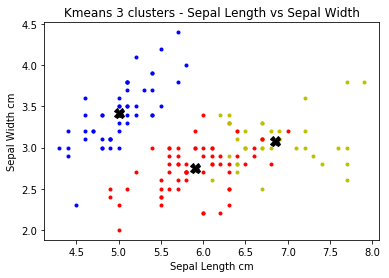

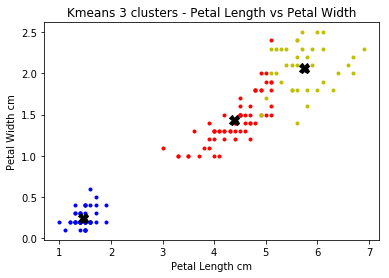

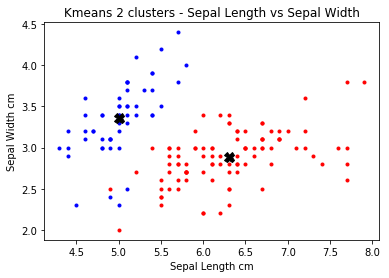

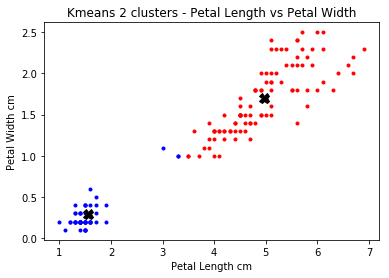

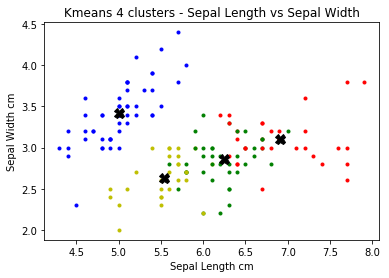

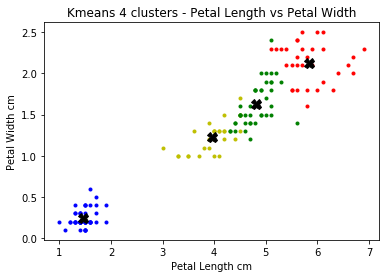

In [600]:
import numpy as np
import matplotlib.pyplot as plt

#NOTE: I couldn't find a way to put the plots side-by-side nor display a proper legend because the points were added in
#via a loop and the color of the point depended on its corresponding predicted balue
colors = ['r.', 'b.', 'y.', 'g.']

print("Red: Iris-setosa")
print("Blue: Iris-versicolor")
print("Yellow: Iris-virginica")
print("Green: Other Category")


#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors[kmeansLabelsIris3[i]])
plt.title("Kmeans 3 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(kmeansCentroidsIris3[0][0], kmeansCentroidsIris3[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris3[1][0], kmeansCentroidsIris3[1][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris3[2][0], kmeansCentroidsIris3[2][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors[kmeansLabelsIris3[i]])
plt.title("Kmeans 3 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(kmeansCentroidsIris3[0][2], kmeansCentroidsIris3[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris3[1][2], kmeansCentroidsIris3[1][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris3[2][2], kmeansCentroidsIris3[2][3], marker='X', markersize=10, color="black")
plt.show()


#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors[kmeansLabelsIris2[i]])
plt.title("Kmeans 2 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(kmeansCentroidsIris2[0][0], kmeansCentroidsIris2[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris2[1][0], kmeansCentroidsIris2[1][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors[kmeansLabelsIris2[i]])
plt.title("Kmeans 2 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(kmeansCentroidsIris2[0][2], kmeansCentroidsIris2[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris2[1][2], kmeansCentroidsIris2[1][3], marker='X', markersize=10, color="black")
plt.show()


#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors[kmeansLabelsIris4[i]])
plt.title("Kmeans 4 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(kmeansCentroidsIris4[0][0], kmeansCentroidsIris4[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[1][0], kmeansCentroidsIris4[1][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[2][0], kmeansCentroidsIris4[2][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[3][0], kmeansCentroidsIris4[3][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors[kmeansLabelsIris4[i]])
plt.title("Kmeans 4 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(kmeansCentroidsIris4[0][2], kmeansCentroidsIris4[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[1][2], kmeansCentroidsIris4[1][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[2][2], kmeansCentroidsIris4[2][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsIris4[3][2], kmeansCentroidsIris4[3][3], marker='X', markersize=10, color="black")
plt.show()

### Iris Data GMM Visualization

Red: Iris-setosa
Blue: Iris-versicolor
Yellow: Iris-virginica
Green: Other Category


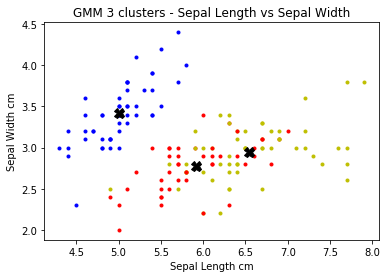

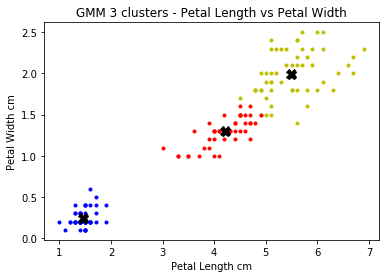

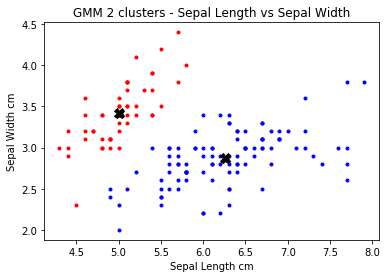

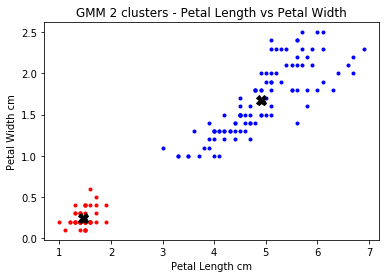

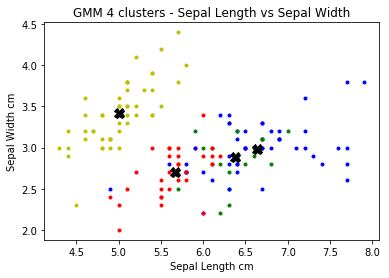

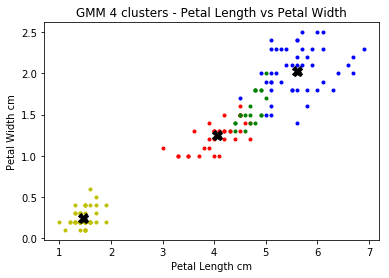

In [601]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

colors2 = ['r.', 'b.', 'y.', 'g.']

print("Red: Iris-setosa")
print("Blue: Iris-versicolor")
print("Yellow: Iris-virginica")
print("Green: Other Category")

#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors2[gmmIrisPredictions3[i]])
plt.title("GMM 3 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(gmmCentersIris3[0][0], gmmCentersIris3[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris3[1][0], gmmCentersIris3[1][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris3[2][0], gmmCentersIris3[2][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors2[gmmIrisPredictions3[i]])
plt.title("GMM 3 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(gmmCentersIris3[0][2], gmmCentersIris3[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris3[1][2], gmmCentersIris3[1][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris3[2][2], gmmCentersIris3[2][3], marker='X', markersize=10, color="black")
plt.show()

#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors2[gmmIrisPredictions2[i]])
plt.title("GMM 2 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(gmmCentersIris2[0][0], gmmCentersIris2[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris2[1][0], gmmCentersIris2[1][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors2[gmmIrisPredictions2[i]])
plt.title("GMM 2 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(gmmCentersIris2[0][2], gmmCentersIris2[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris2[1][2], gmmCentersIris2[1][3], marker='X', markersize=10, color="black")
plt.show()

#Just using 1st and 2nd columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][0], irisDataFeatures[i][1], colors2[gmmIrisPredictions4[i]])
plt.title("GMM 4 clusters - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.plot(gmmCentersIris4[0][0], gmmCentersIris4[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris4[1][0], gmmCentersIris4[1][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris4[2][0], gmmCentersIris4[2][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris4[3][0], gmmCentersIris4[3][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(irisDataFeatures)):
    plt.plot(irisDataFeatures[i][2], irisDataFeatures[i][3], colors2[gmmIrisPredictions4[i]])
plt.title("GMM 4 clusters - Petal Length vs Petal Width")
plt.xlabel("Petal Length cm")
plt.ylabel("Petal Width cm")
plt.plot(gmmCentersIris4[0][2], gmmCentersIris4[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris4[1][2], gmmCentersIris4[1][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersIris4[2][2], gmmCentersIris4[2][3], marker='X', markersize=10, color="black")
plt.show()

The visualizations for the K-means and GMM models for the Iris data appear to do a fairly good job at clustering the samples, based on the features examined above. Both seem to form the 3 cluster and 2 cluster models adequately with the 4 cluster model becoming a bit shaky as there are dots of different colors intertwining within the same space.

The GMM models have less defined boundaries than the K-means models, which is expected. This allows for the GMM algorithm to perform better than the K-means clustering since it gives some flexibility, thereby having more accurate predictions since real-world data is less likely to have definitive boundaries as the K-means algorithm would suggest.

## IV-b. Glass Data Set

### Glass Data K-means Visualization

Red: BuildWindows-Float
Blue: BuildWindows-NonFloat
Yellow: VehicleWindows-Float
Green: Other Category


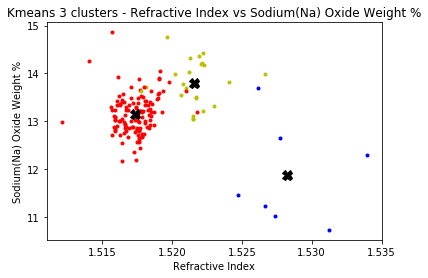

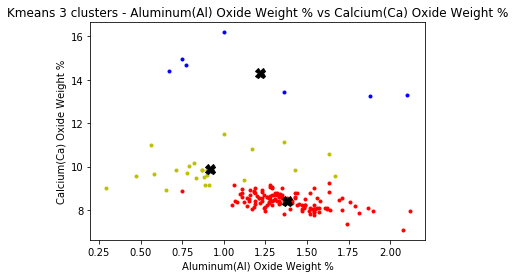

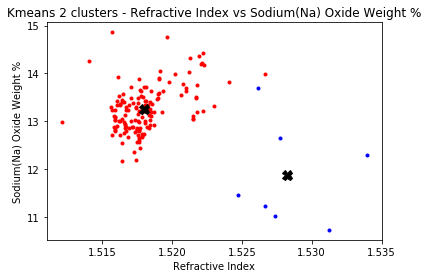

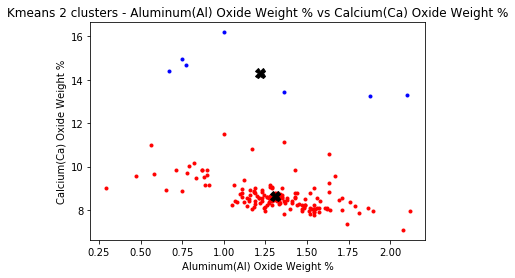

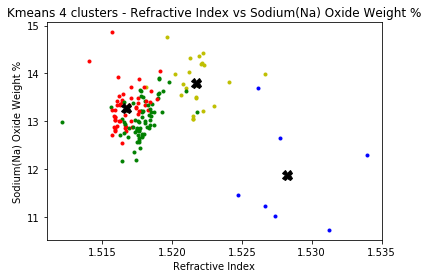

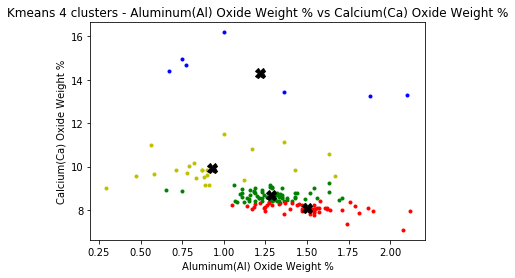

In [602]:
import numpy as np
import matplotlib.pyplot as plt

#NOTE: I couldn't find a way to put the plots side-by-side nor display a proper legend because the points were added in
#via a loop and the color of the point depended on its corresponding predicted balue
colors = ['r.', 'b.', 'y.', 'g.']

print("Red: BuildWindows-Float")
print("Blue: BuildWindows-NonFloat")
print("Yellow: VehicleWindows-Float")
print("Green: Other Category")

#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors[kmeansLabelsGlass3[i]])
plt.title("Kmeans 3 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(kmeansCentroidsGlass3[0][0], kmeansCentroidsGlass3[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass3[1][0], kmeansCentroidsGlass3[1][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass3[2][0], kmeansCentroidsGlass3[2][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors[kmeansLabelsGlass3[i]])
plt.title("Kmeans 3 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(kmeansCentroidsGlass3[0][2], kmeansCentroidsGlass3[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass3[1][2], kmeansCentroidsGlass3[1][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass3[2][2], kmeansCentroidsGlass3[2][3], marker='X', markersize=10, color="black")
plt.show()


#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors[kmeansLabelsGlass2[i]])
plt.title("Kmeans 2 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(kmeansCentroidsGlass2[0][0], kmeansCentroidsGlass2[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass2[1][0], kmeansCentroidsGlass2[1][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors[kmeansLabelsGlass2[i]])
plt.title("Kmeans 2 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(kmeansCentroidsGlass2[0][2], kmeansCentroidsGlass2[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass2[1][2], kmeansCentroidsGlass2[1][3], marker='X', markersize=10, color="black")
plt.show()


#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors[kmeansLabelsGlass4[i]])
plt.title("Kmeans 4 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(kmeansCentroidsGlass4[0][0], kmeansCentroidsGlass4[0][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass4[1][0], kmeansCentroidsGlass4[1][1], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass4[2][0], kmeansCentroidsGlass4[2][1], marker='X', markersize=10, color="black")
plt.show()
#Just using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors[kmeansLabelsGlass4[i]])
plt.title("Kmeans 4 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(kmeansCentroidsGlass4[0][2], kmeansCentroidsGlass4[0][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass4[1][2], kmeansCentroidsGlass4[1][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass4[2][2], kmeansCentroidsGlass4[2][3], marker='X', markersize=10, color="black")
plt.plot(kmeansCentroidsGlass4[3][2], kmeansCentroidsGlass4[3][3], marker='X', markersize=10, color="black")
plt.show()

### Glass Data GMM Visualization

Red: BuildWindows-Float
Blue: BuildWindows-NonFloat
Yellow: VehicleWindows-Float
Green: Other Category


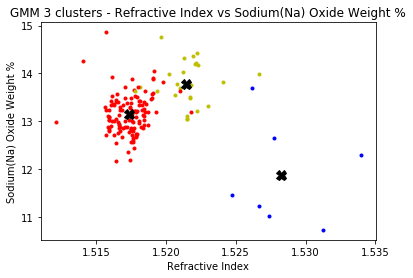

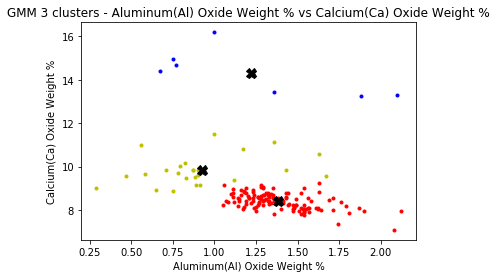

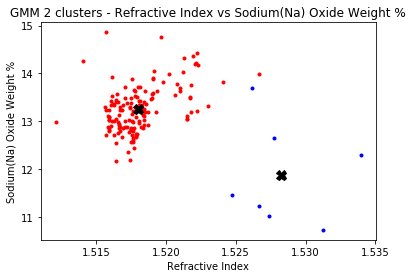

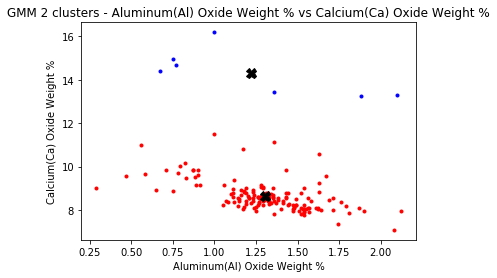

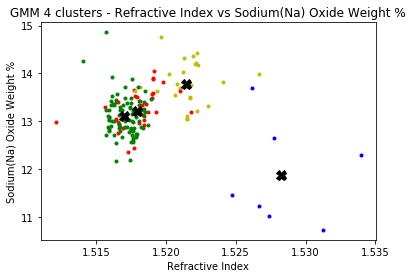

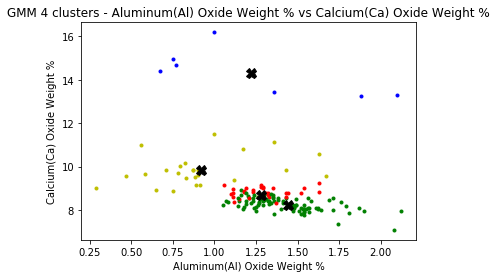

In [603]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

colors2 = ['r.', 'b.', 'y.', 'g.']

print("Red: BuildWindows-Float")
print("Blue: BuildWindows-NonFloat")
print("Yellow: VehicleWindows-Float")
print("Green: Other Category")

#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors2[gmmGlassPredictions3[i]])
plt.title("GMM 3 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(gmmCentersGlass3[0][0], gmmCentersGlass3[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass3[1][0], gmmCentersGlass3[1][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass3[2][0], gmmCentersGlass3[2][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors2[gmmGlassPredictions3[i]])
plt.title("GMM 3 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(gmmCentersGlass3[0][2], gmmCentersGlass3[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass3[1][2], gmmCentersGlass3[1][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass3[2][2], gmmCentersGlass3[2][3], marker='X', markersize=10, color="black")
plt.show()

#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors2[gmmGlassPredictions2[i]])
plt.title("GMM 2 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(gmmCentersGlass2[0][0], gmmCentersGlass2[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass2[1][0], gmmCentersGlass2[1][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors2[gmmGlassPredictions2[i]])
plt.title("GMM 2 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(gmmCentersGlass2[0][2], gmmCentersGlass2[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass2[1][2], gmmCentersGlass2[1][3], marker='X', markersize=10, color="black")
plt.show()

#Just using 1st and 2nd columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][0], glassDataFeatures[i][1], colors2[gmmGlassPredictions4[i]])
plt.title("GMM 4 clusters - Refractive Index vs Sodium(Na) Oxide Weight %")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium(Na) Oxide Weight %")
plt.plot(gmmCentersGlass4[0][0], gmmCentersGlass4[0][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[1][0], gmmCentersGlass4[1][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[2][0], gmmCentersGlass4[2][1], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[3][0], gmmCentersGlass4[3][1], marker='X', markersize=10, color="black")
plt.show()
#Just Using 3rd and 4th columns of iris data
for i in range(len(glassDataFeatures)):
    plt.plot(glassDataFeatures[i][2], glassDataFeatures[i][3], colors2[gmmGlassPredictions4[i]])
plt.title("GMM 4 clusters - Aluminum(Al) Oxide Weight % vs Calcium(Ca) Oxide Weight %")
plt.xlabel("Aluminum(Al) Oxide Weight %")
plt.ylabel("Calcium(Ca) Oxide Weight %")
plt.plot(gmmCentersGlass4[0][2], gmmCentersGlass4[0][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[1][2], gmmCentersGlass4[1][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[2][2], gmmCentersGlass4[2][3], marker='X', markersize=10, color="black")
plt.plot(gmmCentersGlass4[3][2], gmmCentersGlass4[3][3], marker='X', markersize=10, color="black")
plt.show()

The visualizations for the K-means and GMM models for the Glass data appear to also do a fairly good job at clustering the samples, based on the features examined above. Both seem to form the 3 cluster and 2 cluster models adequately with the 4 cluster model becoming a bit shaky as there are dots of different colors intertwining within the same space.

The GMM models have less defined boundaries than the K-means models, which is expected. This allows for the GMM algorithm to perform better than the K-means clustering since it gives some flexibility, thereby having more accurate predictions since real-world data is less likely to have definitive boundaries as the K-means algorithm would suggest.

And while the patterns appear to be similar to those of the Iris data set, there is still some ambiguity at the borders for even the K-means models. Again, this is likely due to the Glass data set not being standardized, especially considering that its features have significant disparities.

# Conclusions

I found that this assignment was much more manageable due to the use of scikit-learn. My main challenge was figuring out how to visualize the data considering that both data sets had more than 2 features/dimensions. Examining 2 features at a time was definitely a very useful technique. I only realized at the very end that the assigned labels from the scikit-learn classes might be swapped (i.e. cluster 0 might correspond to class 1 and cluster 1 might correspond to class 0), which would definitely lower the accuracy. I would suggest telling the next class to consider this in some way, because the visualizations indicated that the clustering was working just fine.

# Extra Credit

Try sklearn.cluster.AgglomerativeClustering on your data and generate dendrogram to analyze the clustering results. 
How are the results different from the previous results? 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data (2 for Iris, 3 for Yours)
 |5| Plots to visualize data (5 for Iris, 5 for yours)
 |5| Reading and analyzing the plots  (5 for Iris, 5 for yours)
15 | Methods | 
 | 5|Summary of K-means and GMM algorithm
 | 5|Experiment description with varying K
 | 5|Explanation of codes
30 | Results | Iris 
| 5| Presenting accuracy
|10| plots for results
|15 | K-means vs GMM
30 | Results | Your Data
| 5| Presenting accuracy
|10| plots for results
|15 | K-means vs GMM
5 | Conclusions 
